In [44]:
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.table import Table
from imaka.analysis import moffat as mof
from imaka.analysis import plot_stats

root_dir = '/Users/fatimaabdurrahman/Desktop/20180821/sta/reduce/'
stats_dir = root_dir + 'stats/'
plots_dir = root_dir + 'plots/'

files_1 = glob(stats_dir+"*1_mdp.fits")
files_2 = glob(stats_dir+"*2_mdp.fits")

labels = ['Open ', 'Nrej7', 'B2   ', 'Mean ']
colors = ['k', 'g', 'b', 'purple']

# 2018-08-21 Observing Summary

The data from this night is consists of 4 cycled modes (open, Nrej7, bin 2, bin 2 mean) broken into the first half (pre-shimming the camera) and the second half (post-shimming).  The following data compares these four modes to eachother and MASS/DIMM data for both half nights.

In [63]:
print_stats(files_1, files_2)

                 Pre-Shimming
Mode          Minor FWHM           Major FWHM
Open         6.06 +/- 0.31        8.55 +/- 0.42
Nrej7        4.56 +/- 0.09        4.88 +/- 0.14
B2           4.57 +/- 0.17        4.7 +/- 0.23
Mean         4.47 +/- 0.11        4.67 +/- 0.17
                 Post-Shimming
Mode          Minor FWHM           Major FWHM
Open         6.07 +/- 0.23        7.68 +/- 0.2
Nrej7        4.43 +/- 0.09        4.59 +/- 0.19
B2           4.35 +/- 0.07        4.48 +/- 0.18
Mean         4.53 +/- 0.14        4.52 +/- 0.28


# Frame-by-frame image quality comparison (Minor FWHM)

### Pre-shimming:

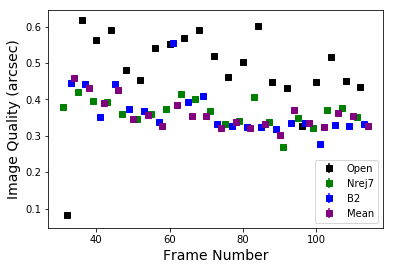

In [8]:
plot_stats.plot_frames(files_1, labels, colors, ps=0.08)

### Post-shimming:

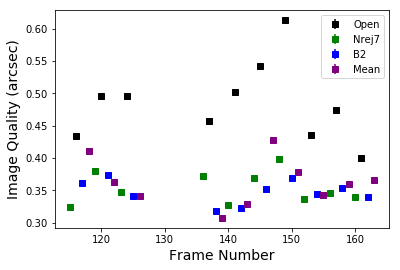

In [11]:
plot_stats.plot_frames(files_2, labels, colors, ps=0.08)

# PSF Comparison Breakdown

### Pre-shimming:

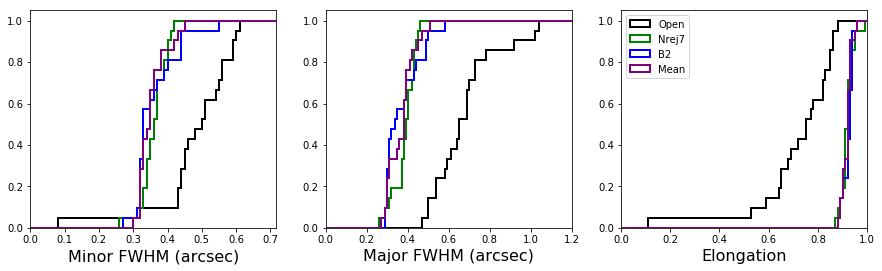

In [9]:
plot_stats.comp_cdf(files_1, labels, colors, ps=0.08)

### Post-shimming:

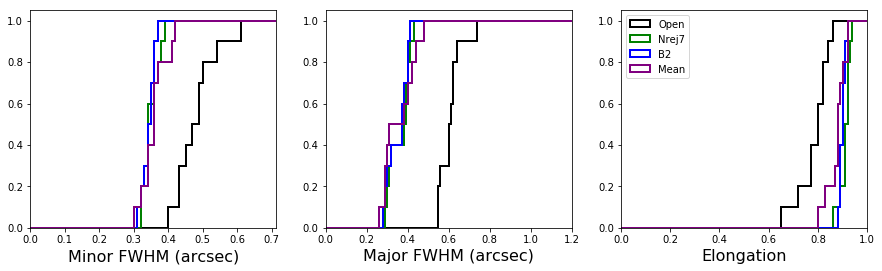

In [12]:
plot_stats.comp_cdf(files_2, labels, colors, ps=0.08)

# MASS/DIMM Comparisons 

## Nrej7 v Open

### Pre-shimming

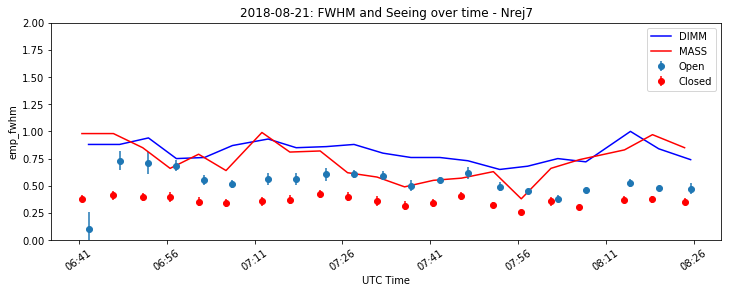

In [3]:
open_file = files_1[0]; closed_file1 = files_1[1]
plot_stats.plot_fwhmvt_nomatch(open_file, closed_file1, 'emp_fwhm', "2018-08-21: FWHM and Seeing over time - Nrej7", plots_dir)

### Post-shimming

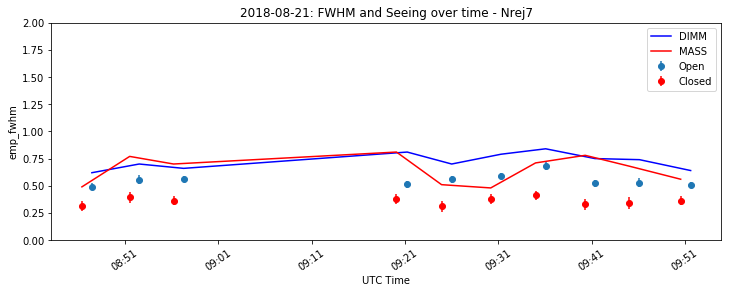

In [16]:
open_file = files_2[0]; closed_file = files_2[1]
plot_stats.plot_fwhmvt_nomatch(open_file, closed_file, 'emp_fwhm', "2018-08-21: FWHM and Seeing over time - Nrej7", plots_dir)

## Open v 3WFS Bin 2

### Pre-shimming

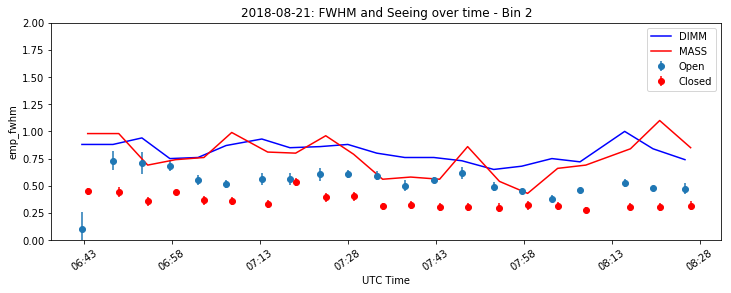

In [4]:
open_file = files_1[0]; closed_file1 = files_1[2]
plot_stats.plot_fwhmvt_nomatch(open_file, closed_file1, 'emp_fwhm', "2018-08-21: FWHM and Seeing over time - Bin 2", plots_dir)

### Post-shimming

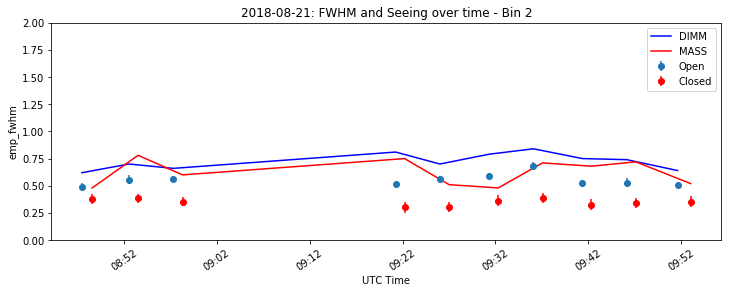

In [15]:
open_file = files_2[0]; closed_file = files_2[2]
plot_stats.plot_fwhmvt_nomatch(open_file, closed_file, 'emp_fwhm', "2018-08-21: FWHM and Seeing over time - Bin 2", plots_dir)

## Open v 3WFS Mean B2

### Pre-shimming:

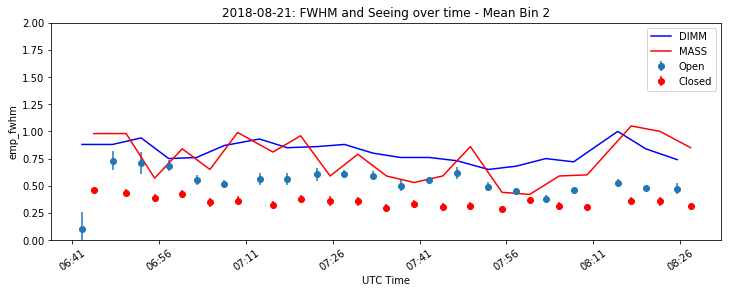

In [5]:
open_file = files_1[0]; closed_file = files_1[3]
plot_stats.plot_fwhmvt_nomatch(open_file, closed_file, 'emp_fwhm', "2018-08-21: FWHM and Seeing over time - Mean Bin 2", plots_dir)

### Post-shimming:

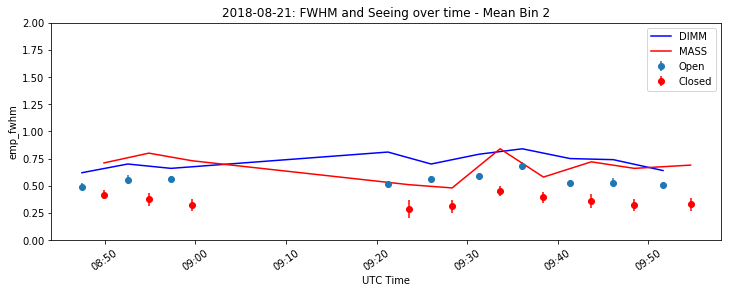

In [17]:
open_file = files_2[0]; closed_file = files_2[3]
plot_stats.plot_fwhmvt_nomatch(open_file, closed_file, 'emp_fwhm', "2018-08-21: FWHM and Seeing over time - Mean Bin 2", plots_dir)

In [62]:
def print_stats(files_1, files_2):

    print('                 Pre-Shimming')
    print('Mode          Minor FWHM           Major FWHM')
    for i in range(4):
        f_min, f_min_err, f_maj, f_maj_err = mof.calc_mof_fwhm(files_1[i])
        fwhm_min = np.mean(f_min)
        fwhm_maj = np.mean(f_maj)
        fwhm_min_err = np.std(f_min)/np.sqrt(len(f_min))
        fwhm_maj_err = np.std(f_maj)/np.sqrt(len(f_maj))
        print(labels[i], '      ',
            np.round(fwhm_min,2), '+/-', np.round(fwhm_min_err,2), \
             '      ',\
             np.round(fwhm_maj,2), '+/-', np.round(fwhm_maj_err,2))

    print('                 Post-Shimming')
    print('Mode          Minor FWHM           Major FWHM')
    for i in range(4):
        f_min, f_min_err, f_maj, f_maj_err = mof.calc_mof_fwhm(files_2[i])
        fwhm_min = np.mean(f_min)
        fwhm_maj = np.mean(f_maj)
        fwhm_min_err = np.std(f_min)/np.sqrt(len(f_min))
        fwhm_maj_err = np.std(f_maj)/np.sqrt(len(f_maj))
        print(labels[i], '      ',
            np.round(fwhm_min,2), '+/-', np.round(fwhm_min_err,2), \
             '      ',\
             np.round(fwhm_maj,2), '+/-', np.round(fwhm_maj_err,2))
        
    return